In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.decomposition import PCA, KernelPCA
import numpy.matlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from scipy.spatial.distance import pdist, squareform
from scipy import exp
from numpy.linalg import eigh
from pandas.plotting import parallel_coordinates

In [2]:
file_name = r'E:\Advanced Computational Finance\quizze\Q2\Q2\vehicles.csv'
vehicles_data = pd.read_csv(file_name, sep = ',')
print 'The dimension of the vehicles data is:\t'+str(vehicles_data.shape)

The dimension of the vehicles data is:	(387, 18)


In [3]:
v_data = vehicles_data.loc[:,'Retail':'Width']
v_data.index.name = 'att'
vehicles_name = vehicles_data.index.tolist()
vehicles_attribute = list(v_data)

v_matrix = pd.DataFrame.as_matrix(v_data)
#print 'The matrix to be analytized is:\n'+str(v_data)
v_scaled = preprocessing.scale(v_matrix)
print str(v_scaled)

[[ 0.5342275   0.47954631  0.36782701 ...,  1.10042148  0.91058658
   0.21507724]
 [ 0.65326826  0.59622579  0.36782701 ...,  1.10042148  0.91058658
   0.21507724]
 [ 0.18852702  0.16200584  0.36782701 ..., -0.17123347  0.30548333
   1.70141457]
 ..., 
 [-0.36022806 -0.32440105 -1.21163543 ..., -0.87770844 -0.37525783
  -0.97399263]
 [ 0.09715245  0.14942056 -0.61933701 ...,  0.25265151  0.07856961
   0.5123447 ]
 [ 0.40706455  0.47042898 -0.22447141 ...,  0.81783149  0.30548333
   1.10687963]]


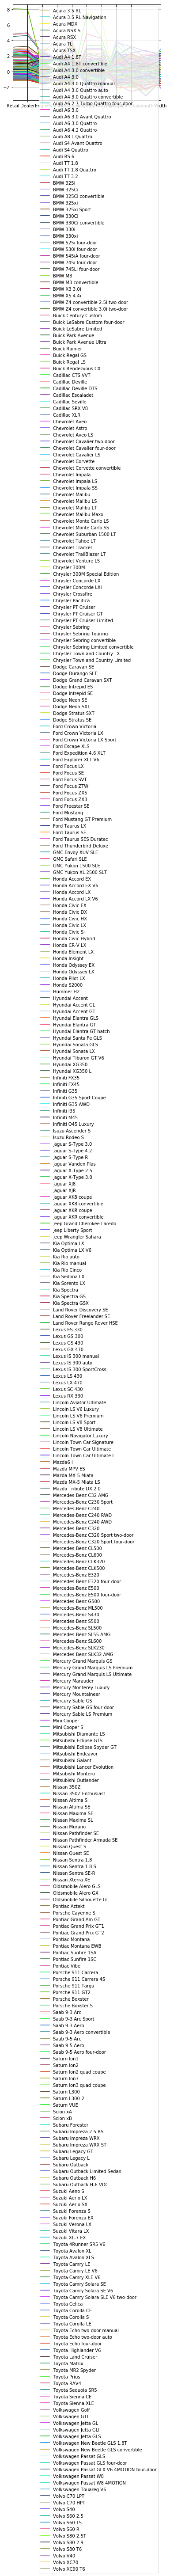

In [4]:
#visualize the matrix
#v_data.T.plot()

#

mat = pd.DataFrame(np.matrix(v_scaled))
mat.columns = ['Retail', 'Dealer', 'Engine', 'Cylinders', 'Horsepower', 'CityMPG', 'HighwayMPG', 'Weight', 'Wheelbase', 'Length', 'Width']
mat['index'] =  v_data.index
parallel_coordinates(mat[['Retail', 'Dealer', 'Engine', 'Cylinders', 'Horsepower', 'CityMPG', 'HighwayMPG', 'Weight', 'Wheelbase', 'Length', 'Width', 'index']], 'index')
plt.show()

In [5]:

def rbf_kernel_pca(X, gamma, n_components):
    # Calculate pairwise squared Euclidean distances
    # in the MxN dimensional dataset.
    sq_dists = pdist(X, 'sqeuclidean')

    # Convert pairwise distances into a square matrix.
    mat_sq_dists = squareform(sq_dists)
    # Compute the symmetric kernel matrix.
    K = exp(-gamma * mat_sq_dists)

    # Center the kernel matrix.
    N = K.shape[0]
    one_n = np.ones((N, N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

    # Obtaining eigenpairs from the centered kernel matrix
    # numpy.linalg.eigh returns them in sorted order
    eigvals, eigvecs = eigh(K)

    # Collect the top k eigenvectors (projected samples)
    X_pc = np.column_stack((eigvecs[:, -i]
                            for i in range(1, n_components + 1)))

    return X_pc

In [7]:
Alpha = rbf_kernel_pca(v_data, gamma=15, n_components=3)

x = Alpha[:,0]
y = Alpha[:,1]
z = Alpha[:,2]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x,y,z, cmap =cm.summer)
ax.set_xlabel("Kernel PC 1")
ax.set_ylabel("Kernel PC 2")
ax.set_zlabel("Kernel PC 3")
for i, text in enumerate(vehicles_name):
    ax.annotate(text, (x[i], y[i]))

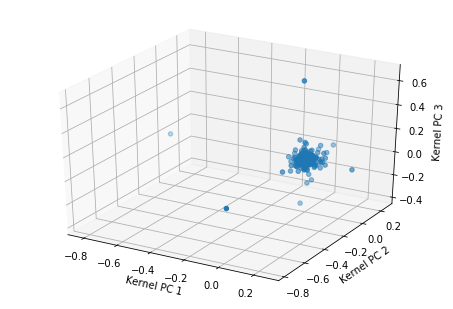

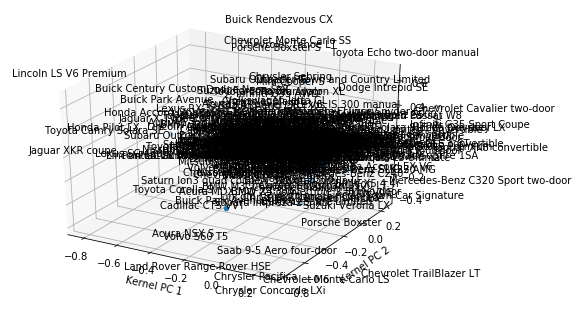

In [8]:
plt.show()

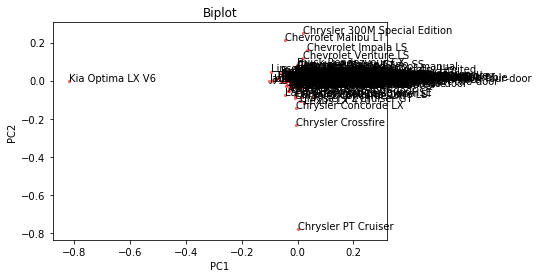

In [87]:
fig, ax = plt.subplots()
x = Alpha[:,0]
y = Alpha[:,1]
ax.scatter(x, y, 5, c=(1,0,0), alpha = 0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Biplot')
for i, text in enumerate(vehicles_name):
    ax.annotate(text, (x[i], y[i]))
    
fig


# x = np.linspace(-1,1,9)
y = np.linspace(-1,1,43)
X,Y = np.meshgrid(x,y)

pc1 = Alpha[:,2].reshape(43,9)
plt.contourf(X,Y,pc1)
plt.show()